In [1]:
%pip install pandas seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 40.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 32.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 KB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 42.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import seaborn as sns
import pandas as pd

In [5]:
sample_data = pd.read_csv('./csv/framework/1.csv')
sample_data

,response-time,DNS+dialup,DNS,Request-write,Response-delay,Response-read,status-code,offset
0,0.0047,0.0005,0.0,0.0037,0.0004,0.0000,200,0.0019
1,0.0049,0.0008,0.0,0.0002,0.0004,0.0036,200,0.0018
2,0.0051,0.0041,0.0,0.0000,0.0008,0.0000,200,0.0016
3,0.0059,0.0006,0.0,0.0037,0.0015,0.0000,200,0.0018
4,0.0045,0.0027,0.0,0.0000,0.0017,0.0000,200,0.0033
...,...,...,...,...,...,...,...,...
99995,0.0002,0.0000,0.0,0.0000,0.0002,0.0000,200,1.3737
99996,0.0002,0.0000,0.0,0.0000,0.0002,0.0000,200,1.3740
99997,0.0002,0.0000,0.0,0.0000,0.0002,0.0000,200,1.3739
99998,0.0002,0.0000,0.0,0.0000,0.0001,0.0000,200,1.3742


In [29]:
def calculate_rps(data):
    requests = len(data.index)
    first = data.iloc[0]
    last = data.iloc[-1]
    time = last['offset'] - first['offset'] + last['response-time']
    return requests / time

In [30]:
calculate_rps(sample_data)

72854.43683520326

In [39]:
import os

def read_logs(dir):
    base_path = f'./csv/{dir}'
    files = []

    for f in os.scandir(base_path):
        if f.is_file() and not f.name.startswith('.'):
            files.append(f'{base_path}/{f.name}')
    
    return list(map(pd.read_csv, files))

nginx_rps = [calculate_rps(data) for data in read_logs('nginx')]
framework_rps = [calculate_rps(data) for data in read_logs('framework')]

nginx_rps, framework_rps

([58051.782189713216,
  62042.43702692642,
  61267.00159294205,
  64578.624475298675,
  65172.05422314911,
  61169.56202593589,
  57853.63031530229,
  56847.2514353931,
  60720.14087072683,
  64292.14350006429,
  62754.941951678695,
  63115.374905326935,
  60890.214942458755,
  62223.88152572958,
  63267.11375427053,
  61908.00470500836,
  64184.85237483954,
  57474.56750387953,
  61732.20569170937,
  58816.60981061052],
 [70377.92948131466,
  71484.7380084352,
  73372.95472888694,
  68861.03842445945,
  72854.43683520326,
  73502.38882763691,
  73265.44069162576,
  73168.94709885125,
  71372.49304118192,
  74217.0105388155,
  74537.86523553965,
  73270.80890973036,
  73303.03474563846,
  69290.46563192905,
  72448.01854669275,
  74593.46561241236,
  69773.93245883338,
  76728.30507174096,
  70726.3597142655,
  75849.5145631068])

In [44]:
import numpy as np

np.mean(framework_rps), np.mean(nginx_rps)

(72649.957408315, 61418.119741048184)

In [42]:
np.std(framework_rps), np.std(nginx_rps)

(2064.2777846598133, 2424.4631312142214)

<Axes: xlabel='proxy', ylabel='rps'>

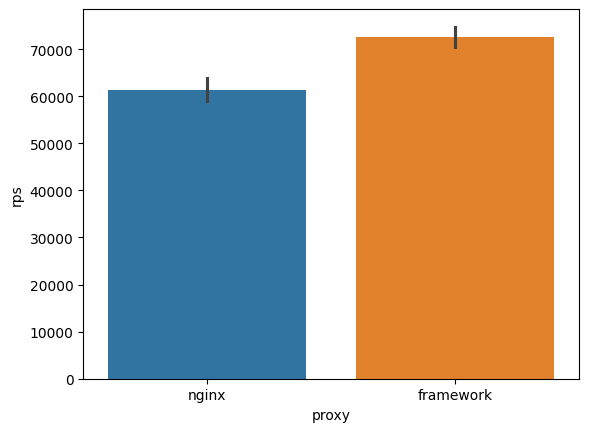

In [48]:
from itertools import chain

data = pd.DataFrame.from_records(list(chain(
    map(lambda x: { 'proxy': 'nginx', 'rps': x }, nginx_rps),
    map(lambda x: { 'proxy': 'framework', 'rps': x }, framework_rps),
)))

sns.barplot(data, x='proxy', y='rps', errorbar='sd', hue='proxy')